In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
from src import config 
from src.data_analysis import load_MRI, show_mri_info
import os
import numpy as np
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt


In [46]:
data_path=config.DATA_TRAIN
label_path=config.LABEL_TRAIN

def check_case(path, idx, modality):
    if modality!='_segm':
        mri_nii=load_MRI(path, idx, modality)
        volume=mri_nii.get_fdata()
        show_mri_info(mri_nii, modality)
    else :
        mri_nii=load_MRI(path, idx, modality)
        volume=mri_nii.get_fdata()
        show_mri_info(mri_nii, modality)
        print('Clases',np.unique(volume))

    fig, ax = plt.subplots(figsize=[10, 3])
    plotting.plot_img(mri_nii, cmap='gray',display_mode="z" ,axes=ax) #, display_mode="z" 
    plt.show()
    return volume



Modality:  _segm
Size: (240, 240, 155)
Data type: float64
Min: 0.0
Max: 4.0
Mean: 0.015204637096774193
Std: 0.18610593347102447
Clases [0. 1. 2. 4.]


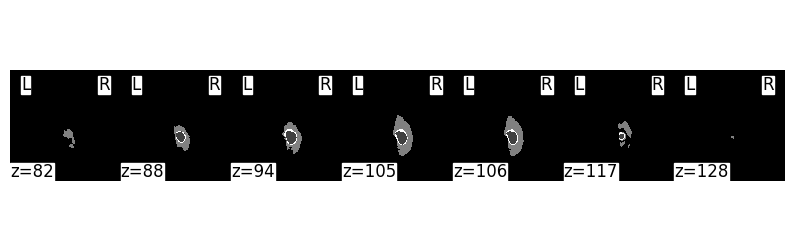

Modality:  _T1GD
Size: (240, 240, 155)
Data type: float64
Min: 0.0
Max: 1449.0
Mean: 68.8343465501792
Std: 151.93476746759146


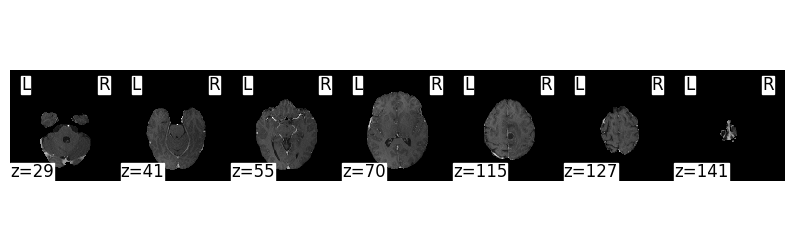

Modality:  _ap-rCBV
Size: (240, 240, 155)
Data type: float64
Min: 0.0
Max: 357.0
Mean: 2.891035730286738
Std: 11.561167422787056


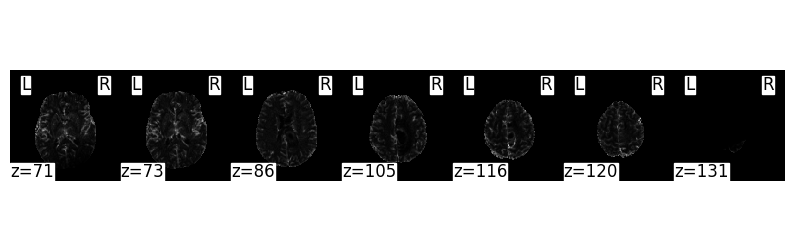

Modality:  DTI_AD
Size: (240, 240, 155)
Data type: float64
Min: 0.0
Max: 0.004426543600857258
Mean: 0.00021733598899272916
Std: 0.0005230850102582496


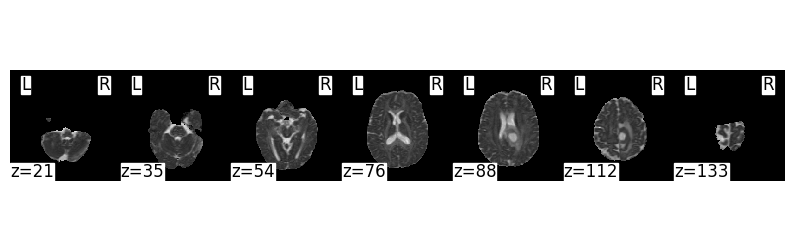

In [49]:
idx=2
GT=check_case(label_path,idx, '_segm')
T1GD=check_case(data_path, idx, '_T1GD')
rCBV=check_case(data_path, idx, '_ap-rCBV')
DTI_AD=check_case(data_path, idx, 'DTI_AD')

Text(0.5, 1.0, 'GT')

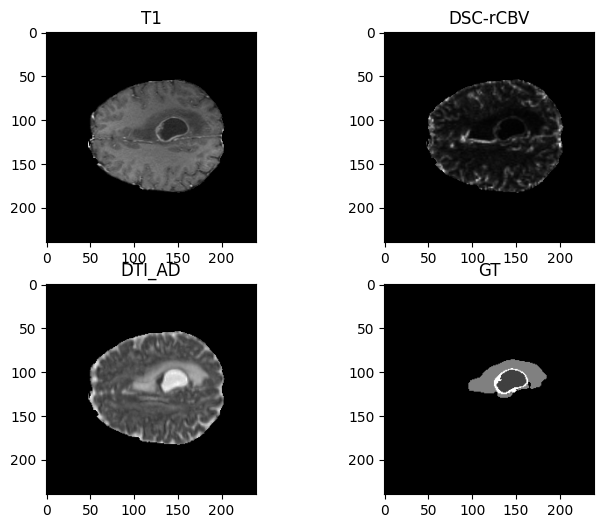

In [48]:
# Crear la figura y los subplots
slice_index=100
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Trazar en el primer subplot
axes[0, 0].imshow(T1GD[:, :, slice_index], cmap="gray")
axes[0, 0].set_title('T1')
axes[0, 1].imshow(rCBV[:, :, slice_index], cmap="gray")
axes[0, 1].set_title('DSC-rCBV')
axes[1, 0].imshow(DTI_AD[:, :, slice_index], cmap="gray")
axes[1, 0].set_title('DTI_AD')
axes[1, 1].imshow(GT[:, :, slice_index], cmap="gray")
axes[1, 1].set_title('GT')
